<img src="skoltech_logo.png" alt="Skoltech" width=60% height=60% />
<h1 style="color:#333333; text-align:center; line-height: 0;">Reinforcement Learning</h1>
<h5 style="color:#333333; text-align:center;">Course MA030422</h5>

<h2 style="color:#A7BD3F;">Lab 1</h2>

***

### Introduction

Welcome to the first lab of the *Reinforcement Learning* course at Skoltech CDISE! 

After the first two lectures and seminars of this course, you have learned about several foundational concepts in reinforcement learning. These concepts include:

* The environment (a.k.a "system" in control theory language)
* Agent (a.k.a "controller")
* States and actions (state-space and action-space)
* Disturbance
* Discrete vs Continuous Time
* Markov Decision Processes (MDP)
* Policy: deterministic and stochastic policies
* Objective functions: *reward* function and *cost-to-go* function (frequently known as the **Bellman value function**)
* Optimization of the objective functions
* Discounting of rewards
* Time horizons: finite or infinite
* The overall goal of the agent: to learn the **optimal** implicit or explicit model of the environment in order act optimally to fulfill some goal.


### Why labs?

Lab assignments offer various benefits to students. Mainly, they a) provide students with an opportunity to *apply* the theoretical concepts and methods that they learned about during lecture; b) teach students how to use technology related to the course; and c) give students an opportunity for problem-solving.

### Goal of this lab

The purpose of this lab **<font color="green">is</font>**:
* to become acquainted with the basic functionality of a Python package that we will be utilizing for learning RL.

The purpose of this lab **<font color="red">is not</font>**:
* to dive into detailed RL algorithms (this comes later)

### Components of this lab (Total points: 15)
* **Section 1**: Prerequisites
* **Section 2**: Intro to Rcognita
* **Section 3**: Using Rcognita
    * Exercise 1
        * Problem 1.1 (1 point)
        * Problem 1.2 (1 point)
    * Exercise 2
        * Problem 2.1 (3 points)
        * Problem 2.2 (5 points)
        * Problem 2.3 (2 points)
        * Problem 2.4 (3 points)

<h2 style="color:#A7BD3F;">Section 1 - Prerequisites</h2>

***

### Before getting started: installation

To complete this lab, you first need to install *Rcognita*. You should have already done this after reading the repo README - but if you haven't then head over to Canvas and read the installation_requirements document. Note that it is a best practice to install this package into a virtual environment.

### Quick review

Thus far, you have learned about the two principle entities in reinforcement learning: the agent and the environment. At a basic level, the interaction between these two entities is as follows: the agent observes the state of the environment, calculcates and takes actions, and receives rewards and new states from the environment. This is a cyclical process <sup>[1]</sup>:

<img src="agent_env.png" alt="Agent-Env interaction" width=55% height=55% />

Through this process, the agent learns (an implicit or explicit policy) for taking actions that maximize reward over some time horizon.

#### Before we get started, a word on terminology

If you had a chance to dive into the Python code of this package on your own time, then you might have noticed some terminology that differs from more "popular" RL terms. I.e., you may have seen:
* "System" instead of environment
* "Controller" instead of agent
* "cost-to-go" instead of optimal (Bellman) value function
* "Feedback loop" instead of training iteration

These terms are interrelated and often interchangeable. They come from systems theory, control theory, and dynamic programming. RL has evolved from these fields (among others) and thus shares many concepts with them, especially as related to mathematical processes and entity names. 

For our purposes, you should become acquainted with the following terms and concepts <sup>[2]</sup>:

<img src="notation.png" alt="Notation" width=45% height=45% />

<h2 style="color:#A7BD3F;">Section 2 - Intro to Rcognita</h2>

***

### Rcognita

Rcognita is Python framework for RL training, research and visualization. The purpose of Rcognita is to train RL algorithms in a dynamic environment.
* **Definition**: An environment is dynamic if it changes while the agent is in the process of action selection. Otherwise, the environment is static.

The **environment** in Rcognita is based upon a 3-wheel robot:

<img src="endi1.png" alt="Notation" width=40% height=40% />

The purpose of the **agent** is to learn to control the robot to move it to the target (0,0) xy-coordinates 2D Euclidean space:

<img src="endi2.png" alt="Notation" width=40% height=40% />

This training task and objective can be achieved with a variety of agent algorithms and customizations to the environment, which we will discuss later.

### Environment inputs and outputs

Next, let's examine the input/output variables of the agent and environment in Rcognita in order to understand how they interact.

The environment (being the robot in Euclidean space), takes two inputs:
* **F**: pushing force (N for Newton)
* **M**: turning torque (Nm for Newton metre)

It is the agent's task to determine these two inputs and input them to the environment. 

For it's part, the environment outputs a new state, which has the following 5 characteristics:
* **x ($x_c$)** = x-coordinate (m)
* **y ($y_c$)** = y-coordinate (m)
* **alpha ($\alpha$)** = turning angle (rad)
* **upsilon ($\upsilon$)** = velocity (m/s)
* **omega ($\omega$)** = revolution speed (rad/s) (aka turning speed)

To calculate $\upsilon$ (velocity) and $\omega$ (revolution speed), the environment also takes the following 2 parameters:
* **m** = robot's mass (kg)
* **I** = robot's moment of inertia around the vertical axis (kg m^2)

Let us now formulate these variables in a mathematical representation often used in control theory. For a given time-step, $t$:
* Action or control input is given by: $\hspace{3mm}u_t = (F, M)$
* Environment is given by: $\hspace{3mm}x_t = (x_c, y_c, \alpha, \upsilon, \omega)$

### The agent: learning how to act

To understand how the agent learns to pilot a 3-wheeled robot to its objective, we can study a simplified Markov Decision Process (MDP). This MDP is "simplified" because it is formalized from the perspective of a *deterministic* environment (instead of a *stochastic* environment).
* **Definition**: a deterministic environment is one in which a specific action in a given state always leads to the same next state. <sup>[3]</sup>

In the case of a deterministic setting, the MDP is characterised by 3 functions:
* The transition function: $f: X \times U \rightarrow U$
* The reward function (Greek letter rho): $\rho: X \times U \rightarrow R$
* And the policy function $h: X \rightarrow U$

By taking the variables defined above and applying them to these functions, below we arrive at the following simplified MDP that governs training in Rcognita.

The environment executes the transition function:

$$x_{t+1} = f(x_t, u_t)$$

For the current time-step $t$: the current state $x_t$ and controller action $u_t$ is inputted to the environment, which outputs the next state $x_{t+1}$.

Similarly, the environment also provides a signal to the agent in the form of a reward:

$$R_{t+1} = \rho(x_t, u_t)$$

The reward function is the objective function that the agent seeks to maximize. (**Note**: an RL training problem may be formulized as *minimizing* the objective function, where the objective is the "cost-to-go". This cost-to-go is the difference between the optimal value function and the agent's *learned* value function. That is why the term cost-to-go is used and in this case we are minimizing, not maximizing).

And finally, the policy function. The policy is precisely what the agent needs to learn to succeed at the objective - and it is described as:

$$ u_t = h(x_t) $$

Thus at time step $t$, the agent takes as input the state of the environment $x_t$ and outputs the action to take, $u_t$.

<h2 style="color:#A7BD3F;">Section 3 - Using Rcognita</h2>

***

### Design of *Rcognita*

Rcognita contains 4 *primary* classes:

1. System class
    - a.k.a environment
    - key functionality: defines the state of the environment and returns the next state given an action from the controller
2. Controller class
    - a.k.a agent
    - key functionality: implements ActorCritic model that calculates actions for states
    - Goal is to learn a model for taking actions (aka policy) that minimizes the cost-to-go objective
3. NominalController class
    - Calculates actions that serve as a baseline for comparison to the controller's actions
4. Simulation class
    - Creates and runs a training simulation
    
Let's examine these classes in code and learn how to use Rcognita.

### First, import the package. 
<font color="red">❗**Note**:</font> make sure that the kernel selected in Jupyter (labeled in the top-right corner under the logout button in this notebook) is the virtual env that you installed Rcognita into! You can change this under the Kernel task bar. See the lab_1 README on github for details.

In [1]:
from rcognita import System, NominalController, Controller, Simulation, AnswerTracker

### <font color="orange">Auto-grading: run answer tracker</font>
Run this cell to track your answers

In [7]:
### GRADING DO NOT MODIFY
lab1_answers = AnswerTracker()

<h2 style="color:blue;">Exercise 1 - reading the docs</h2> 

Much of the initial documentation for this package is baked right into the code in the form of *docstrings*. Examining docstrings is a way of reading documentation about each class and learning the components of functionality.

Let's study the System class by calling the `print_docstring` method.

In [3]:
#System.print_docstring()


    Class denoting the RL environment.

    ----------
    Parameters
    ----------

    dim_state : int
        dimension of state vector
        x_t = [x_c, y_c, alpha, upsilon, omega]

    dim_input : int
        * dimension of action vector
        * u_t = [F, M]

    dim_output : int
        * dimension of output vector
        * x_t+1 = [x_c, y_c, alpha, upsilon, omega]

    dim_disturb : int
        * dimension of disturbance vector
        * actuator disturbance that gets added to F and M

    initial_x : int
        * initial x coordinate of robot

    initial_y : int
        * initial x coordinate of robot

    m : int
        * m = robot's mass

    I : int
        * I = moment of inertia about the vertical axis

    f_min, f_max, m_min, m_max : all int
        * control bounds

    f_man : int
        * manual control variable for pushing force

    m_man: int
        * manual control variable for steering/turning torque

    is_dyn_ctrl : int
        * is dynamic control

True

Review this docstring and compare it to the information about environment variables from **Section 2**. Make sure you are familiar with the variables under the "ENVIRONMENT VARIABLES" table above.

### View default parameters

You can also view parameters and their default values for any class in *Rcognita* by calling the `print_init_params` method:

In [4]:
Controller.print_docstring()


    Optimal controller (a.k.a. agent) class.

    ----------
    Parameters
    ----------

    system : object of type `System` class
        object of type System (class)

    t0 : int
        * Initial value of the controller's internal clock

    t1 : int
        * End value of controller's internal clock

    n_actor : int
        Number of prediction steps. n_actor=1 means the controller is purely data-driven and doesn't use prediction.

    n_critic : int
        Critic stack size. The critic optimizes the temporal error, a.k.a. the value (of state) function. The temporal errors are stacked up using the said buffer.

    buffer_size : int
        The size of the buffer to store data for model estimation. The bigger the buffer, the more accurate the estimation may be achieved. Using a larger buffer results in better model estimation at the expense of computational cost.

    ctrl_mode : int
        Modes with online model estimation are experimental
        * 0 : manual constant

True

<h2 style="color:blue;">Problem 1.1</h2>

#### 🎯 Task: Between the comments below, call the `print_docstring` method on the `Controller` class and briefly glance over the parameters.

In [ ]:
System.

In [5]:
"""
Replace 'None' with the method call
"""

### SOLUTION BEGIN
p11 = Controller.print_docstring()
### SOLUTION END


    Optimal controller (a.k.a. agent) class.

    ----------
    Parameters
    ----------

    system : object of type `System` class
        object of type System (class)

    t0 : int
        * Initial value of the controller's internal clock

    t1 : int
        * End value of controller's internal clock

    n_actor : int
        Number of prediction steps. n_actor=1 means the controller is purely data-driven and doesn't use prediction.

    n_critic : int
        Critic stack size. The critic optimizes the temporal error, a.k.a. the value (of state) function. The temporal errors are stacked up using the said buffer.

    buffer_size : int
        The size of the buffer to store data for model estimation. The bigger the buffer, the more accurate the estimation may be achieved. Using a larger buffer results in better model estimation at the expense of computational cost.

    ctrl_mode : int
        Modes with online model estimation are experimental
        * 0 : manual constant

### <font color="orange">Auto-grading:</font>
Run this cell to save your answer. Make sure you defined the necessary variable above to avoid a `NameError` below.

In [8]:
### GRADING DO NOT MODIFY
lab1_answers.record('problem_1-1', p11)

### DO NOT MODIFY
if hasattr(Controller, 'func_has_been_called'):
    setattr(Controller, 'func_has_been_called', False)

### Analysis

Examine the docstring carefully. Don't be too hard on yourself - but make sure you have a basic intuition of the meaning of the variables above. We will learn the specifics in detail later (in the next homework assignments).

<h2 style="color:blue;">Problem 1.2</h2>

#### 🎯 Task: In the code cell below, find and specify the default value for the parameter `ctrl_mode` from the `Controller` class.

In [33]:
Controller.print_init_params()

system
t0=0
t1=15
n_actor=10
n_critic=50
buffer_size=50
ctrl_mode=3
critic_mode=1
critic_update_time=0.1
r_cost_struct=1
sample_time=0.2
pred_step_size=1
estimator_update_time=0.1
estimator_buffer_fill=6
estimator_buffer_power=2
stacked_model_params=0
model_order=3
gamma=1


True

In [29]:
loc_test

[True]

In [34]:
"""
Between the comments below, add your answer to a variable named `ctrl_mode`.
"""

### SOLUTION BEGIN
p12 = Controller.print_init_params()
ctrl_mode = 3
### SOLUTION END

system
t0=0
t1=15
n_actor=10
n_critic=50
buffer_size=50
ctrl_mode=3
critic_mode=1
critic_update_time=0.1
r_cost_struct=1
sample_time=0.2
pred_step_size=1
estimator_update_time=0.1
estimator_buffer_fill=6
estimator_buffer_power=2
stacked_model_params=0
model_order=3
gamma=1


### <font color="orange">Auto-grading:</font>
Run this cell to save your answer. Make sure you defined the necessary variables above to avoid a `NameError` below.

In [35]:
### GRADING DO NOT MODIFY
lab1_answers.record('problem_1-2', {'func_called': p12, 'ctrl_mode': ctrl_mode})

In [38]:
lab1_answers.answer_dict

{'problem_1-1': True, 'problem_1-2': {'func_called': True, 'ctrl_mode': 3}}

### Analysis

Read the options for `ctrl_mode`. Notice the words 'discretized model'... What does discretized mean 🤔?

In RL there are 2 types of state-spaces: *continuous* and *discrete*. A discrete state takes on values from a finite set of values (i.e. discrete states have a **countable** number of possible states).

On the other hand, a state is continuous if it takes on values from a continuous function. Continuous states have infinite possible values. 

Discretization is the process of dividing **(1)** a continuous state-space into discrete (finite) state-space
and **(2)** dividing a continuous action-space into discrete action-space in order to formulate the RL learning task in a way that can be numerically approximated (i.e. so that the the optimal value function can be computationally approximated).

The concept of discretization also applies to time, especially in the context of the simulations we will see next. Consider that an agent can sample the environment at potentially infinite time intervals. Time is thus discretized into 'time-steps', during which sampling, observing, and stepping is conducted.

<h2 style="color:blue;">Exercise 2 - Running simulations</h2>

Let's run a simulation in Rcognita. Don't worry, we'll take it in steps. 

In [39]:
from rcognita import System, NominalController, Controller, Simulation
from IPython.display import HTML

# Step 1: Instantiate the environment
sys = System()

# Step 2: Instantiate the agent/controller
agent = Controller(sys,
                    ctrl_mode=5,
                    buffer_size=50,
                    n_actor=4,
                    n_critic=20,
                    critic_mode=3,
                    t1 = 30,
                    estimator_buffer_power=8, 
                    estimator_buffer_fill=0.5)

A quick description of the controller arguments:

* ### ctrl_mode
    - Stacked Q-learning. Prediction via discretized true model
* ### buffer_size
    - size of the buffer to store data for model estimation
* ### n_actor
    - The number of time steps the actor is predicting into the future (from the current time step)
* ### n_critic
    - The number of temporal errors (from value function) that are used from the buffer
    - cannot be larger than buffer_size
* ### critic_mode
    - Choice of the structure of the critic's feature vector
    - 3 is quadratic, no mixed terms
* ### estimator_buffer_power
    - Power of probing noise during an initial phase to fill the estimator's buffer before applying optimal control
* ### t1
    * end time
* ### estimator_buffer_fill
    - The number of seconds of sampling to fill the buffer before action selection
    
Continuing:

In [40]:
# Step 3: instantiate the nominal controller
nominalCtrl = NominalController()

# Step 4: instantiate the simulation
sim = Simulation(sys, agent, nominalCtrl)

### Step 5: run the simulation
<font color="red">❗**Note**:</font> 
* Do not scroll your notebook while running the simulation to avoid lag
* Press 'q' to quit the simulation prematurely

<IPython.core.display.Javascript object>


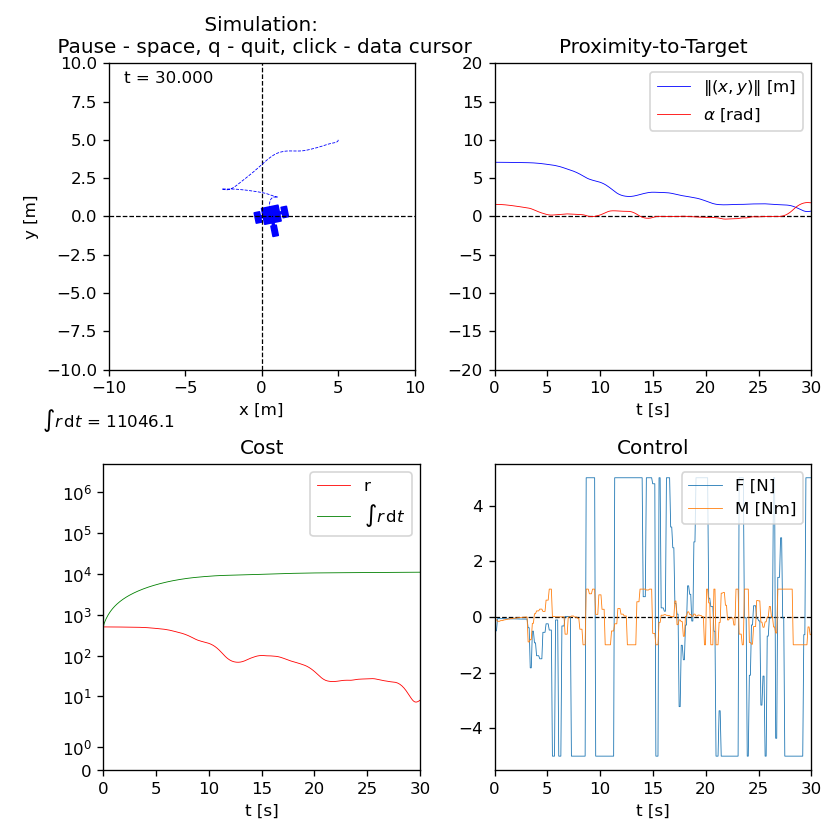

<IPython.core.display.HTML object>

In [41]:
# do not delete
%matplotlib notebook 

# adjust the figure width and height to suit the cell size of your jupyter notebook
HTML(sim.run_simulation(fig_width=7, fig_height=7))

The simulation should have ran the full duration of 30 seconds. We can confirm this by checking the `t_elapsed` attribute of the `sim` object. 

<h2 style="color:blue;">Problem 2.1</h2>

#### 🎯 Task: Print the `t_elapsed` attribute below:

In [44]:
sim.t_elapsed

30

In [45]:
"""
Between the comments below, record the value of sim.t_elapsed into the provided variable
"""

### SOLUTION BEGIN
sim_t_elapsed = sim.t_elapsed
### SOLUTION END

### <font color="orange">Auto-grading:</font>
Run this cell to save your answer. Make sure you defined the necessary variable above to avoid a `NameError` below.

In [46]:
### GRADING DO NOT MODIFY
lab1_answers.record('problem_2-1', sim_t_elapsed)

In [48]:
lab1_answers.answer_dict

{'problem_1-1': True,
 'problem_1-2': {'func_called': True, 'ctrl_mode': 3},
 'problem_2-1': 30}

### Side note

🔔 You can also run Rcognita in a separate window with the commands below. Note that you will need to restart your Jupyter kernel **before** and **after**.

Try using different matplotlib backends if one fails.
```
%matplotlib tk
sim.run_simulation(close_plt_on_finish = False)
```

or 


```
%matplotlib qt
sim.run_simulation(close_plt_on_finish = False)
```

<h2 style="color:blue;">Problem 2.2 - create your own simulation</h2>

####  🎯 Task: Create a  `Controller` (object) that achieves a L2-norm of < 0.05 in 22 seconds
* **Definition**: The L2 norm (aka Euclidean norm) is the distance of the controller ((x,y) coordinates) to (0,0) for a given time-step `t`.
* The Euclidean norm is found in the top-right 'Proximity-to-Target' plot during simulation visualization.

### Parameters

Pass the following parameters to instantiate the `Controller` class. The **bold** parameters are provided for you to plug in. You must determine the <font color="orange">orange</font> parameters.

`System` class:
* **initial_x = -5**
* **initial_y = -5**

`Controller` class:
* **estimator_buffer_power = 6** 
* **estimator_buffer_fill = 2**
* **gamma = 0.95**
* **t1 = 22**
* <font color="orange">ctrl_mode</font> (hint: use a discretized model)
* <font color="orange">buffer_size</font>
* <font color="orange">n_actor</font>
* <font color="orange">n_critic</font>
* <font color="orange">estimator_update_time</font>

### Solution by Grol

In [53]:
Controller.print_init_params()

system
t0=0
t1=15
n_actor=10
n_critic=50
buffer_size=50
ctrl_mode=3
critic_mode=1
critic_update_time=0.1
r_cost_struct=1
sample_time=0.2
pred_step_size=1
estimator_update_time=0.1
estimator_buffer_fill=6
estimator_buffer_power=2
stacked_model_params=0
model_order=3
gamma=1


True

In [50]:
# Step 1: Instantiate the environment
sys = System()

# Step 2: Instantiate the agent/controller
agent = Controller(sys,
                    ctrl_mode=5,
                    buffer_size=50,
                    n_actor=6,
                    n_critic=20,
                    critic_mode=3,
                    t1 = 22,
                    estimator_buffer_power=6, 
                    estimator_buffer_fill=2,
                    estimator_update_time=0.01,
                    gamma=0.95)

In [58]:
sim2.l2_norm

0.2675170760300983

<IPython.core.display.Javascript object>


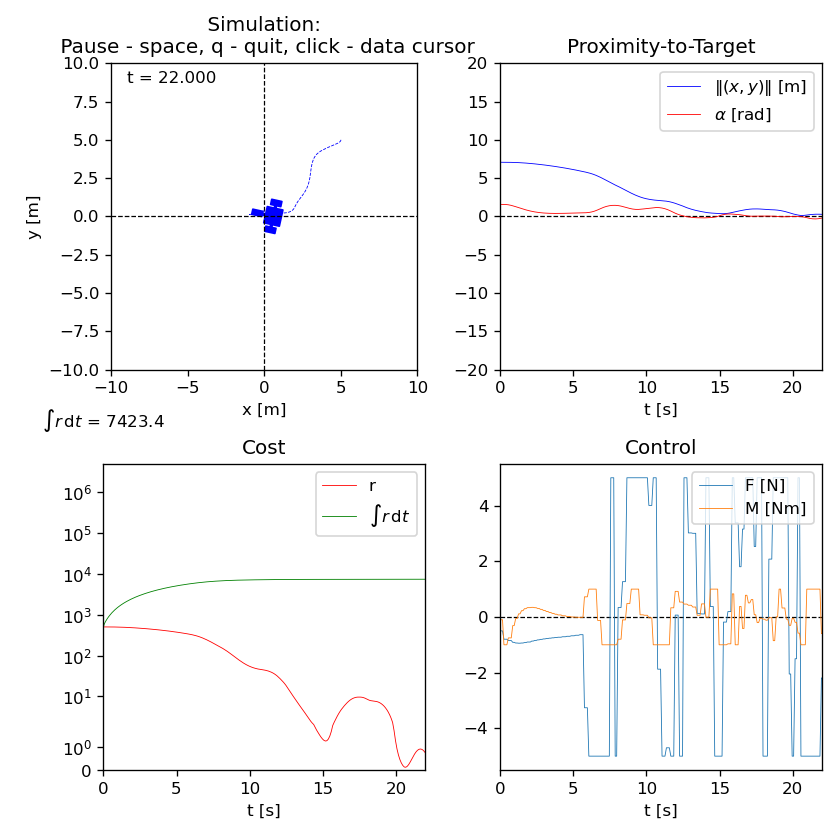

<IPython.core.display.HTML object>

In [60]:
"""
Only modify code between the comments below. 
If you need help to determine the parameters, remember to use the functions from Exercise 1.
"""
import warnings
warnings.filterwarnings('ignore')
from rcognita import System, NominalController, Controller, Simulation
from IPython.display import HTML

### SOLUTION BEGIN
# Step 1: Instantiate the environment
sys = System()

# Step 2: Instantiate the agent/controller
agent = Controller(sys,
                    ctrl_mode=5,
                    buffer_size=100,
                    n_actor=10,
                    n_critic=30,
                    critic_mode=3,
                    t1 = 22,
                    estimator_buffer_power=6, 
                    estimator_buffer_fill=2)
### SOLUTION END

nominal_ctrl = NominalController()

sim2 = Simulation(sys, agent, nominal_ctrl)

# Run the simulation
%matplotlib notebook
HTML(sim2.run_simulation(fig_width=7, fig_height=7))

#print(f'Resulted l2norm is: {sim2.l2_norm}')

### <font color="orange">Auto-grading:</font>
Run this cell to save your answer. Make sure you finished the simulation above to avoid an error below.

In [61]:
### GRADING DO NOT MODIFY
lab1_answers.record('problem_2-2', {'initial_x': sys.initial_x, 
                                    'initial_y': sys.initial_y, 
                                    'estimator_buffer_power': agent.estimator_buffer_power, 
                                    'estimator_buffer_fill': agent.estimator_buffer_fill, 
                                    'gamma': agent.gamma, 
                                    'ctrl_mode': agent.ctrl_mode, 
                                    't1': agent.t1,
                                    't_elapsed': sim2.t_elapsed,
                                    'l2_norm': sim2.l2_norm})

In [62]:
lab1_answers.answer_dict

{'problem_1-1': True,
 'problem_1-2': {'func_called': True, 'ctrl_mode': 3},
 'problem_2-1': 30,
 'problem_2-2': {'initial_x': 5,
  'initial_y': 5,
  'estimator_buffer_power': 6,
  'estimator_buffer_fill': 2,
  'gamma': 1,
  'ctrl_mode': 5,
  't1': 22,
  't_elapsed': 22,
  'l2_norm': 0.2675170760300983}}

<h2 style="color:blue;">Problem 2.3 - Sample Time and Prediction Step Size</h2>

Let's think about 2 important parameters from the `Controller` class:
* `sample_time`
* `pred_step_size`

Sample time refers to the controller's sampling time: **how often in seconds the controller samples the environment**. This "sampling" of the environment simply means that the controller observes the state of the environment to decide what action to take next.

Prediction step size refers to the time between performing control inputs (i.e taking actions) and receiving outputs from the environment. Thus, this period **implicitly refers to how often the controller takes actions**.

Analyze: how are these two variables related?
* Consider if *sample time* > *prediction step size* (the agent samples the environment much more frequently than taking actions)
* And consider *sample time* < *prediction step size* (the agent samples the environment much less frequently than taking actions)

Let's consider this scenario below:
* Agent 1 has a sample time of 0.3 seconds and prediction step size of 0.6 seconds
* Agent 2 has a sample time of 0.6 seconds and prediction step size of 0.3 seconds

#### 🎯  Task: Run the multi-controller simulation prepared for you below to analyze this scenario. 

🔔 **Note:**
- Each agent performs 2 runs
- Each agent has a maximum sample time of 25 time steps

<IPython.core.display.Javascript object>


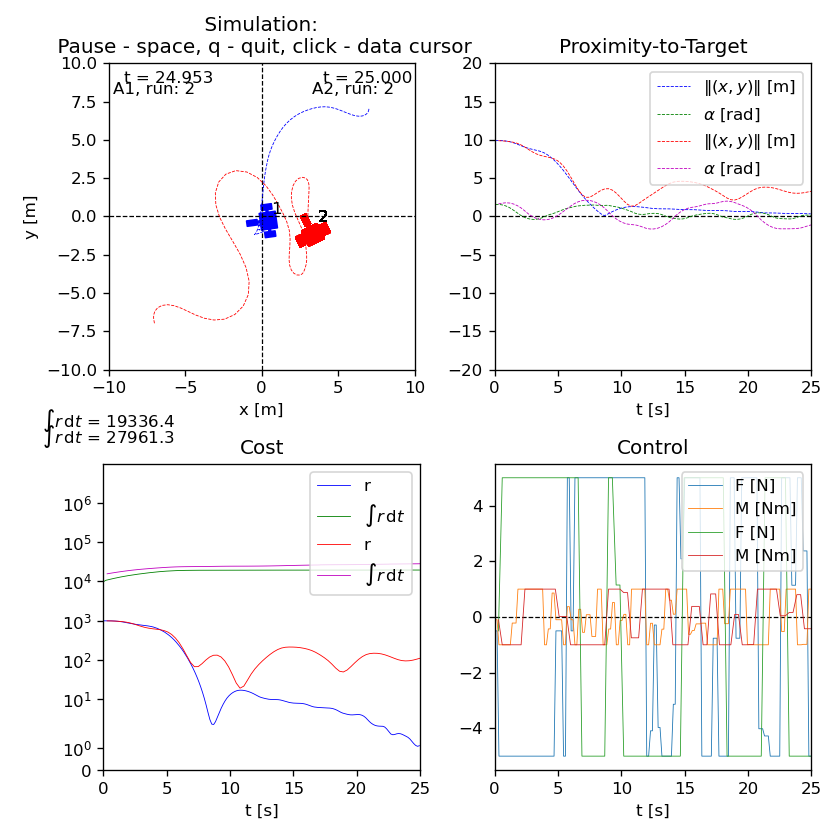

<IPython.core.display.HTML object>

In [63]:
from rcognita import System, NominalController, Controller, Simulation
from IPython.display import HTML

# create system
sys = System(initial_x=7, initial_y=7) # creates bot #1

# add a bot to coordinate (-7, -7)
sys.add_bots(-7,-7) # creates bot #2

# create two nominal controllers to serve as baseline for each controller
nominal_ctrl1 = NominalController()
nominal_ctrl2 = NominalController()

agent1 = Controller(sys,
                    sample_time=0.3,
                    pred_step_size=0.6,
                    critic_mode=3,
                    ctrl_mode=3,
                    buffer_size=20,
                    n_actor=10,
                    n_critic=10,
                    t1=25,
                    estimator_update_time=0.3)

agent2 = Controller(sys,
                    sample_time=0.6,
                    pred_step_size=0.3,
                    critic_mode=3,
                    ctrl_mode=3,
                    buffer_size=20,
                    n_actor=10,
                    n_critic=10,
                    t1=25,
                    estimator_update_time=0.3)

sim3 = Simulation(sys, [agent1, agent2], [nominal_ctrl1, nominal_ctrl2])

# Run the simulation
%matplotlib notebook
HTML(sim3.run_simulation(n_runs=2, fig_width=7, fig_height=7, show_annotations=True))

## Analysis

After viewing the simulation, which agent do you think was more successful in minimizing the objective function (reducing the running cost to arrive at its target coordinates)? If you **correctly** followed the instructions for the parameters above, the result should be obvious. In the code cell below, write your answer:

In [74]:
"""
Define which agent was more successful in the variable `winner` below
by specifying `winner = 1` for agent 1 or `winner = 2` for agent 2.
"""

### SOLUTION BEGIN
winner = 1
### SOLUTION END

### <font color="orange">Auto-grading:</font>
Run this cell to save your answer. Make sure you defined the necessary variables above to avoid a `NameError` below.

In [75]:
### GRADING DO NOT MODIFY
lab1_answers.record('problem_2-3', {'t_elapsed': sim3.t_elapsed, 'winner': winner})

In [76]:
lab1_answers.answer_dict

{'problem_1-1': True,
 'problem_1-2': {'func_called': True, 'ctrl_mode': 3},
 'problem_2-1': 30,
 'problem_2-2': {'initial_x': 5,
  'initial_y': 5,
  'estimator_buffer_power': 6,
  'estimator_buffer_fill': 2,
  'gamma': 1,
  'ctrl_mode': 5,
  't1': 22,
  't_elapsed': 22,
  'l2_norm': 0.2675170760300983},
 'problem_2-3': {'t_elapsed': [25, 25], 'winner': 1}}

We can find out for sure which agent was a more effective learner by printing some statistics from the simulation:

In [73]:
sim3.print_simu_stats()

Total runs for each controller: 2
Statistics for controller 1:
            - Mean of running cost: 183.63
            - Variance of running cost: 106017.03
            - Mean of velocity: -0.45
            - Variance of velocity: 0.61
            - Variance of alpha: 0.34
            - Final L2-norm: 0.33
                
Statistics for controller 2:
            - Mean of running cost: 263.29
            - Variance of running cost: 93885.98
            - Mean of velocity: 1.11
            - Variance of velocity: 1.12
            - Variance of alpha: 2.5
            - Final L2-norm: 3.29
                


Examine and compare the statistics above for each controller. 

The most important statistics above are the mean of running cost $\mu_{cost}$, variance of running cost $\sigma^2_{cost}$, and variance of velocity $\sigma^2_{velocity}$

If you correctly implemented the instructions for the simulation, then three observations can be made:

1. By comparing $\mu_{cost}$ for both controllers, we see that *on average* controller 1 was better at selecting actions for observations from the environment. Controller 1 learned a better model of the environment for maximizing value (and thus reducing cost) over the same time horizon than Controller 2.

2. Controller 1 has a lower $\sigma^2_{velocity}$ than controller 2. This means controller 1 was *more stable* and less eratic in its charted path, and thus was more sensitive in the magnitude of its selected actions. It charted a slower but more sure path towards the target coordinates by sampling the environment more frequently and taking actions less frequently than controller 2.

3. The L2-norm of controller 1 is lower, indicating a better position of the robot in relation to its target thus a more accurate learned policy.

Also, notice that a reduced sampling time period leads to much quicker episodes (i.e. for controller 2).

In conclusion, we can say that controller 1 was a "sure-and-steady" learner; one that learned a better policy to maximize value than controller 2.

### Something to think about

Going forward, as you work with different environments in reinforcement learning -- try to think about the implications of the frequency of sampling the environment versus the frequency of taking actions. There is a balance to be made between these two parameters and this balance will differ depending on the environment and the challenges of that environment.

### Lastly

You should also know that it's possible to run Rcognita without visualizations. This option is much faster computationally.

<h2 style="color:blue;">Problem 2.4 - Running Rcognita without the visualization</h2>

#### 🎯  Task: Run a simulation with 3 agents. 

🔔 **Note**:
* Notice how `add_bots()` is utilized to create additional controllers
* The `System()` class by default creates 1 controller.

**Requirements:**
* Create 3 controller objects
* Create 3 nominal controller objects
* Controller 1 should have `t1 = 20`
* Controller 2 should have `t1 = 30`
* Controller 3 should have `t1 = 40`
* For Simulation class, use `n_runs=2`
* For Simulation class, use `print_summary_stats=True` 
* For Simulation class, use `print_statistics_at_step=False`
* For the remaining controller parameters (for each controller), free free to copy the same parameters used in problem 2.2

In [ ]:
from rcognita import System, NominalController, Controller, Simulation
from IPython.display import HTML

# environment
sys = System() # already creates bot #1
sys.add_bots(-5,-5) # creates bot #2
sys.add_bots(-7,7) # creates bot #3

### SOLUTION BEGIN

### SOLUTION END

sim4 = Simulation(sys, 
                  [agent1, agent2, agent3], 
                  [nominal_ctrl1, nominal_ctrl2, nominal_ctrl3])

sim4.run_simulation(n_runs=2, 
                    is_visualization=False,
                    print_summary_stats=True, 
                    print_statistics_at_step=False)

### <font color="orange">Auto-grading:</font>
Run this cell to save your answer. Make sure you performed the simulation above to avoid a `NameError` below.

In [ ]:
### GRADING DO NOT MODIFY
lab1_answers.record('problem_2-4', {'num_controllers': sim4.num_controllers, 
                                    'is_visualization': sim4.is_visualization,
                                   'agent1_t1': agent1.t1,
                                   'agent2_t1': agent1.t1,
                                   'agent3_t1': agent1.t1,})

lab1_answers.print_answers()

### <font color="orange">Auto-grading: Submit your answers</font>
Enter your first and last name in the cell below and then run it to save your answers for this lab to a JSON file. The file is saved to the same directory as this notebook. After the file is created, upload the JSON file to the assignment page on Canvas.

In [ ]:
assignment_name = "lab_1"
first_name = "YOUR_FIRST_NAME" # Use proper capitalization
last_name = "YOUR_LAST_NAME" # Use proper capitalization

lab1_answers.save_to_json(assignment_name, first_name, last_name)

❗Failure to properly submit this JSON file by the due date will result in a failed grade - so please reach out **ahead of the deadline** if you have questions or problems.

## Questions?

Reach out to your instructors on Piazza (you can find it in Canvas on the left-most menu).

## Sources

***

<sup>[1]</sup> Barnabás Póczos, Carnegie Mellon, Introduction To Machine Learning: Reinforcement Learning (Course).

<sup>[2]</sup> Levine, S., Finn, C., Darrell, T., & Abbeel, P. (2016). End-to-End Training of Deep Visuomotor Policies. J. Mach. Learn. Res., 17, 39:1-39:40.

<sup>[3]</sup> Busoniu, L., Babuška, R., Schutter, B.D., & Ernst, D. (2010). Reinforcement Learning and Dynamic Programming Using Function Approximators.

***

<h6 style="color:#A3A3A3; text-align: center">Not to be distributed - Copyright AIDA Lab Skoltech</h6>

## Buble sort 


In [100]:
import numpy as np

array = [10,5,  7,  4,-22,  4,  5,  5,  2,  9,  2,  8, 10]
print(array)
for i in range(len(array)):
 #   print('i',i)
    for j in range(len(array)-1):
#        print('j',j, end=' ')
        if array[j] >= array[j+1]:
            array[j], array[j+1] = array[j+1], array[j]
        else:
            continue
        print(array)
print(array)

[10, 5, 7, 4, -22, 4, 5, 5, 2, 9, 2, 8, 10]
[5, 10, 7, 4, -22, 4, 5, 5, 2, 9, 2, 8, 10]
[5, 7, 10, 4, -22, 4, 5, 5, 2, 9, 2, 8, 10]
[5, 7, 4, 10, -22, 4, 5, 5, 2, 9, 2, 8, 10]
[5, 7, 4, -22, 10, 4, 5, 5, 2, 9, 2, 8, 10]
[5, 7, 4, -22, 4, 10, 5, 5, 2, 9, 2, 8, 10]
[5, 7, 4, -22, 4, 5, 10, 5, 2, 9, 2, 8, 10]
[5, 7, 4, -22, 4, 5, 5, 10, 2, 9, 2, 8, 10]
[5, 7, 4, -22, 4, 5, 5, 2, 10, 9, 2, 8, 10]
[5, 7, 4, -22, 4, 5, 5, 2, 9, 10, 2, 8, 10]
[5, 7, 4, -22, 4, 5, 5, 2, 9, 2, 10, 8, 10]
[5, 7, 4, -22, 4, 5, 5, 2, 9, 2, 8, 10, 10]
[5, 7, 4, -22, 4, 5, 5, 2, 9, 2, 8, 10, 10]
[5, 4, 7, -22, 4, 5, 5, 2, 9, 2, 8, 10, 10]
[5, 4, -22, 7, 4, 5, 5, 2, 9, 2, 8, 10, 10]
[5, 4, -22, 4, 7, 5, 5, 2, 9, 2, 8, 10, 10]
[5, 4, -22, 4, 5, 7, 5, 2, 9, 2, 8, 10, 10]
[5, 4, -22, 4, 5, 5, 7, 2, 9, 2, 8, 10, 10]
[5, 4, -22, 4, 5, 5, 2, 7, 9, 2, 8, 10, 10]
[5, 4, -22, 4, 5, 5, 2, 7, 2, 9, 8, 10, 10]
[5, 4, -22, 4, 5, 5, 2, 7, 2, 8, 9, 10, 10]
[5, 4, -22, 4, 5, 5, 2, 7, 2, 8, 9, 10, 10]
[4, 5, -22, 4, 5, 5, 2, 7, 2, 8,

In [95]:
array


[-22, 2, 2, 4, 4, 5, 5, 5, 7, 8, 9, 10, 10]